# K-Means Clustering
## Aditya Bagad

### Importing the required libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import random
from sklearn.datasets.samples_generator import make_blobs 

### Creating the dataset

In [2]:
np.random.seed(0)

In [3]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

The **make_blobs** class can take in many inputs, but we will be using these specific ones.

**Input**
- **n_samples**: The total number of points equally divided among clusters. 
    - Value will be: 5000 
- **centers**: The number of centers to generate, or the fixed center locations. 
    - Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]]
- **cluster_std**: The standard deviation of the clusters. 
    - Value will be: 0.9 

**Output**
- **X**: Array of shape [n_samples, n_features]. (Feature Matrix)
    - The generated samples.
    
- **y**: Array of shape [n_samples]. (Response Vector)
    - The integer labels for cluster membership of each sample.


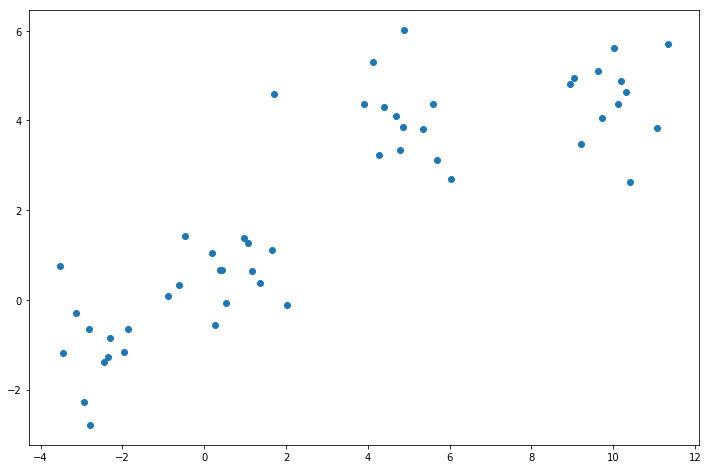

In [4]:
plt.figure(figsize=(12, 8))
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 

### Modeling

### Agglomerative Clustering

The Agglomerative Clustering class will require two inputs:

- n_clusters: The number of clusters to form as well as the number of centroids to generate.
    - Value will be: 4
    
- linkage: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
    - Value will be: 'complete'

In [5]:
from sklearn.cluster import AgglomerativeClustering 

aggClustring = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

aggClustring.fit(X1,y1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=4, pooling_func='deprecated')

### Create a Visual Plot

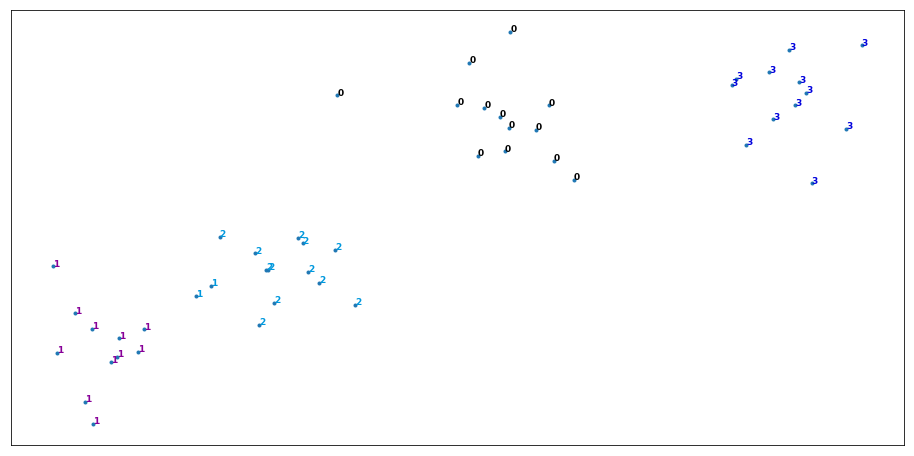

In [6]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,8))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(aggClustring.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

### Dendrogram Associated for the Agglomerative Hierarchical Clustering
Remember that a <b>distance matrix</b> contains the <b> distance from each point to every other point of a dataset </b>. <br>
Use the function <b> distance_matrix, </b> which requires <b>two inputs</b>. Use the Feature Matrix, <b> X2 </b> as both inputs and save the distance matrix to a variable called <b> dist_matrix </b> <br> <br>
Remember that the distance values are symmetric, with a diagonal of 0's. This is one way of making sure your matrix is correct. <br> (print out dist_matrix to make sure it's correct)

In [7]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

In [8]:
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[0.         0.89221967 0.08362736 ... 0.38011012 0.78910769 0.77496568]
 [0.89221967 0.         0.93347579 ... 0.55895655 0.18458274 0.12494651]
 [0.08362736 0.93347579 0.         ... 0.39635751 0.84286948 0.8202518 ]
 ...
 [0.38011012 0.55895655 0.39635751 ... 0.         0.5119048  0.46018236]
 [0.78910769 0.18458274 0.84286948 ... 0.5119048  0.         0.10318462]
 [0.77496568 0.12494651 0.8202518  ... 0.46018236 0.10318462 0.        ]]


Using the linkage class from hierarchy, pass in the parameters:

- The distance matrix
- 'complete' for complete linkage

In [9]:
Z = hierarchy.linkage(dist_matrix, 'complete')

g:\python-64bit\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


A Hierarchical clustering is typically visualized as a dendrogram as shown in the following cell. Each merge is represented by a horizontal line. The y-coordinate of the horizontal line is the similarity of the two clusters that were merged, where cities are viewed as singleton clusters. By moving up from the bottom layer to the top node, a dendrogram allows us to reconstruct the history of merges that resulted in the depicted clustering.

Next, we will save the dendrogram to a variable called dendro. In doing this, the dendrogram will also be displayed. Using the dendrogram class from hierarchy, pass in the parameter: **Z**

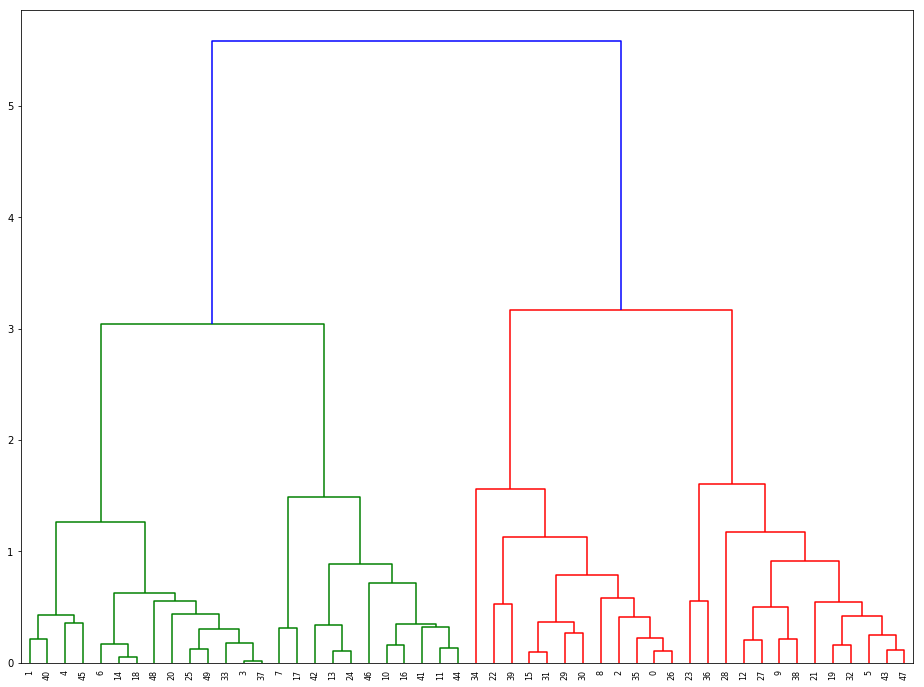

In [10]:
plt.figure(figsize=(16,12))

dendro = hierarchy.dendrogram(Z)